<img src=https://www.nimble.com/blog/wp-content/uploads/2019/08/chatbot-2-730x365.jpg width="400">

<h1 style="text-align:center;font-size:30px;" > Chatbot Application Using NLTK </h1>

## Description
Human language is astoundingly complex and diverse. When we write, we often misspell or abbreviate words, or omit punctuation. There is a lot of unstructured data around us. Natural language processing helps computers communicate with humans in their own language and scales other language-related tasks. NLP makes it possible for computers to read text, interpret it, measure sentiment and determine which parts are important.

Understanding this will enable you to build the core component of any conversational chatbot. In this NLP application we will create the core engine of a chat bot. We will learn text classification using the techniques of natural language processing by using the nltk library.

## Downloading and installing NLTK
NLTK(Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

[Natural Language Processing with Python](http://www.nltk.org/book/) provides a practical introduction to programming for language processing.

For platform-specific instructions, read [here](https://www.nltk.org/install.html)



In [22]:
#nltk.download()

## Importing Necessary Libraries

In [23]:
import nltk
import re
import os
import csv
from nltk.stem.snowball import SnowballStemmer
import random
from nltk.classify import SklearnClassifier
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import pandas as pd
import string

from wordcloud import WordCloud
import matplotlib.pyplot as plt
st_wrds = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [24]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [25]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Pre-Processing the text

### Function to preprocess the text

In [26]:

def preprocess(sentence):
    #converting every words to lowercase
    sentence = sentence.lower()
    
    #remove chars that are not letter or numbers
    #tokenizing sentence
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    
    #filtering all the non alphabetical words
    sentence = [word for word in tokens if word.isalpha()]
    
    #removing stop words
    tokens = [word for word in sentence if not word in st_wrds]
    return tokens

In [27]:
nltk.pos_tag(preprocess("This is very bad performance 20/5 in 10 over5s during to Virat 10kohli's can't you"))

[('bad', 'JJ'), ('performance', 'NN'), ('virat', 'NN')]

### Function to filter important POS(Part Of Speech) tags

In [28]:
#This function will receive tuple of word with tag
def extract_tagged(sentences):
    features = []
    for tagged_words in sentences:
        word, tag = tagged_words
        if tag=='NN' or tag == 'VBN' or tag == 'NNS' or tag == 'VBP' or tag == 'RB' or tag == 'VBZ' or tag == 'VBG' or tag =='PRP' or tag == 'JJ':
            features.append(word)
    return features

### Function to extract text features after preprocessing and pos_tag filtering

In [29]:
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

def extract_feature(text):
    #Calling function to  pre-process text
    words = preprocess(text)
    
    #Getting tag of each word as list of tuple(word, tag) after pre-processing
    tags = nltk.pos_tag(words)
    #Calling function to filter important tags after pos tagging
    extracted_feature = extract_tagged(tags)
    
    #stemming words
    stemmed_words = [stemmer.stem(w) for w in extracted_feature]
    
    #lemmatizing words
    result = [lemma.lemmatize(w) for w in stemmed_words]
    
    return result
    

## Implementing bag of words

In simple terms, it’s a collection of words to represent a sentence, disregarding the order in which they appear.

In [30]:
def word_feats(words):
    return dict([(word, True) for word in words])

# Parsing the Whole Document

In [31]:
def extract_feature_from_doc(data):
    result = []
    corpus = []
    # the response of chatbot
    answers = {}
    for (text, category, answer) in data:
        #getting list of words after pre-processing each text
        features = extract_feature(text)
        
        #appending words into empty list corpus and creating vocabulary
        corpus.append(features)
        result.append((word_feats(features), category))
        answers[category] = answer
    
    return (result, sum(corpus, []), answers)

In [32]:
extract_feature_from_doc([['Hello','Greeting','How can i help you?'],
                          ['Thank you', 'Exit', 'Glad to help you'],
                          ['No help required on performance', 'Ask', 'Do you need more assitance']])

([({'hello': True}, 'Greeting'),
  ({'thank': True}, 'Exit'),
  ({'help': True, 'requir': True, 'perform': True}, 'Ask')],
 ['hello', 'thank', 'help', 'requir', 'perform'],
 {'Greeting': 'How can i help you?',
  'Exit': 'Glad to help you',
  'Ask': 'Do you need more assitance'})

## Loading Document

In [33]:
def get_doc_content(filepath):
#    doc = os.path.join(filename)
    with open(filepath, 'r') as content_file:
        lines = csv.reader(content_file, delimiter = '|')
        data = [x for x in lines if len(x) == 3]
        return data

In [34]:
os.getcwd()

'C:\\Users\\samee\\OneDrive\\Data_science\\ML_Projects\\1. Chatbot using NLTK'

In [35]:
filepath = r'leaves.txt'
data = get_doc_content(filepath)

## Extracting Features, Corpus and Answers from data

In [36]:
features_data, corpus, answers = extract_feature_from_doc(data)

In [37]:
features_data[:10]

[({'hello': True}, 'Greetings'),
 ({'hi': True, 'hello': True}, 'Greetings'),
 ({'hi': True}, 'Greetings'),
 ({'hi': True}, 'Greetings'),
 ({'hi': True}, 'Greetings'),
 ({'hey': True}, 'Greetings'),
 ({'hello': True, 'hi': True}, 'Greetings'),
 ({'hey': True}, 'Greetings'),
 ({'hey': True, 'hi': True}, 'Greetings'),
 ({'hey': True, 'hello': True}, 'Greetings')]

In [38]:
len(features_data)

143

In [39]:
print('Total words in corpus ', len(corpus))
corpus[23:43]

Total words in corpus  426


['want',
 'help',
 'need',
 'help',
 'help',
 'want',
 'help',
 'want',
 'assist',
 'help',
 'great',
 'talk',
 'great',
 'thank',
 'help',
 'thank',
 'thank',
 'much',
 'thank',
 'thank']

In [40]:
print('Unique words in corpus ',len(set(corpus)))

Unique words in corpus  36


In [41]:
answers

{'Greetings': 'Hello. I am Dexter. I will serve your leave enquiries.',
 'Morning': 'Good Morning. I am Dexter. I will serve your leave enquiries.',
 'Afternoon': 'Good afternoon. I am Dexter. I will serve your leave enquiries.',
 'Evening': 'Good evening. I am Dexter. I will serve your leave enquiries.',
 'Goodbye': 'Good night. Take care.',
 'Opening': "I'm fine! Thank you. How can I help you?",
 'Help': 'How can I help you?',
 'No-Help': 'Ok sir/madam. No problem. Have a nice day.',
 'Closing': "It's glad to know that I have been helpful. Have a good day!",
 'Leaves-Type': 'Currently I know about two: annual and optional leaves.',
 'Default-Utilized-Annual-Leaves': 'You have used 12 annual leaves.',
 'Utilized-Annual-Leaves': 'You have taken 12 annual leaves.',
 'Utilized-Optional-Leaves': 'You have taken 1 optional leaves.',
 'Default-Balance-Annual-Leaves': 'You have 25 annual leaves left.',
 'Balance-Annual-Leaves': 'You have 25 annual leaves remaining.',
 'Balance-Optional-Leave

## Visualizing Wordcloud

<Figure size 720x720 with 0 Axes>

(-0.5, 7999.5, 3999.5, -0.5)

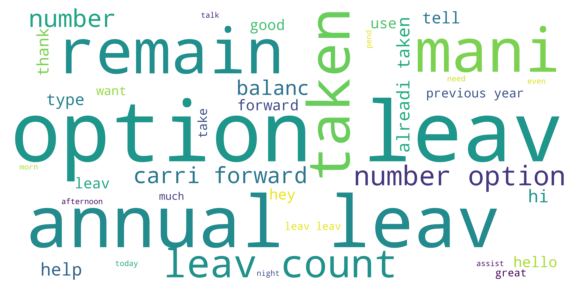

In [42]:
text = ' '.join(corpus)

wordcloud = WordCloud(max_font_size=200,
                      max_words=len(corpus),
                      background_color='white',
                      scale=10,
                      width=800,
                      height=400).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,
           interpolation='bilinear') #to make the displayed image appear more smoothly
plt.axis('off')
plt.show()

## Manually Splitting our whole data into Train and Test set

### Function to split our dataset

In [43]:
def split_dataset(data, split_ratio):
    random.seed(23)
    random.shuffle(data)
    data_length = len(data)
    train_split = int(data_length * split_ratio)
    return (data[:train_split]), (data[train_split:])

In [44]:
#defining the split ratio
split_ratio = 0.8
training_data, test_data = split_dataset(features_data, split_ratio)

In [45]:
training_data[:15]

[({'want': True, 'help': True}, 'No-Help'),
 ({'annual': True, 'leav': True, 'remain': True}, 'Balance-Annual-Leaves'),
 ({'hey': True}, 'Greetings'),
 ({'number': True,
   'option': True,
   'leav': True,
   'alreadi': True,
   'taken': True},
  'Utilized-Optional-Leaves'),
 ({'annual': True, 'leav': True}, 'Balance-Annual-Leaves'),
 ({'option': True, 'leav': True, 'count': True, 'remain': True},
  'Balance-Optional-Leaves'),
 ({'mani': True, 'carri': True, 'forward': True, 'leav': True}, 'CF'),
 ({'number': True, 'option': True, 'leav': True}, 'Utilized-Optional-Leaves'),
 ({'option': True, 'leav': True, 'balanc': True}, 'Balance-Optional-Leaves'),
 ({'option': True, 'leav': True, 'taken': True}, 'Utilized-Optional-Leaves'),
 ({'forward': True, 'leav': True}, 'CF'),
 ({'mani': True, 'annual': True, 'leav': True}, 'Balance-Annual-Leaves'),
 ({'annual': True, 'leav': True, 'balanc': True}, 'Balance-Annual-Leaves'),
 ({'leav': True, 'pend': True}, 'Default-Balance-Annual-Leaves'),
 ({'l

## Saving the data

In [46]:
np.save('training_data', training_data)
np.save('test_data', test_data)

## Model Prepration

### 1. Classification using Decision Tree Classifier

In [47]:
def train_using_decision_tree(training_data, test_data):
    
    classifier = nltk.classify.DecisionTreeClassifier.train(training_data, entropy_cutoff = 0.6, support_cutoff=6)
    classifier_name = type(classifier).__name__
    print(classifier_name)
    training_set_accuracy = nltk.classify.accuracy(classifier, training_data)
    print('Training Set Accuracy: ', training_set_accuracy*100)
    test_set_accuracy = nltk.classify.accuracy(classifier, test_data)
    print('Test Set Accuracy: ', test_set_accuracy*100)
    return classifier, classifier_name, training_set_accuracy, test_set_accuracy

In [48]:
entropy = [0.1, 0.2]


In [49]:
dtclassifier, classifier_name, train_accuracy, test_accuracy = train_using_decision_tree(training_data, test_data)

DecisionTreeClassifier
Training Set Accuracy:  90.35087719298247
Test Set Accuracy:  82.75862068965517


In [50]:
print(dtclassifier.pseudocode())

if annual == None: 
  if option == None: 
    if forward == None: 
      if leav == None: return 'Closing'
      if leav == True: return 'Default-Balance-Annual-Leaves'
    if forward == True: return 'CF'
  if option == True: 
    if taken == None: 
      if use == None: return 'Balance-Optional-Leaves'
      if use == True: return 'Utilized-Optional-Leaves'
    if taken == True: return 'Utilized-Optional-Leaves'
if annual == True: 
  if taken == None: return 'Balance-Annual-Leaves'
  if taken == True: return 'Utilized-Annual-Leaves'



### 2. Classification using Naive Bayes

In [51]:
def train_using_naive_bayes(training_data, test_data):
    classifier = nltk.NaiveBayesClassifier.train(training_data)
    classifier_name = type(classifier).__name__
    training_set_accuracy = nltk.classify.accuracy(classifier, training_data)
    test_set_accuracy = nltk.classify.accuracy(classifier, test_data)
    return classifier, classifier_name, training_set_accuracy, test_set_accuracy

In [52]:
NBclassifier, classifier_name, train_set_accuracy, test_set_accuracy = train_using_naive_bayes(training_data, test_data)
print(classifier_name)
print('Training Set Accuracy: ', train_set_accuracy*100)
print('Test Set Accuracy: ', test_set_accuracy*100)
print('*'*40)
print(len(NBclassifier.most_informative_features()))
print(NBclassifier.show_most_informative_features())

NaiveBayesClassifier
Training Set Accuracy:  86.8421052631579
Test Set Accuracy:  75.86206896551724
****************************************
66
Most Informative Features
                    leav = None           Closin : Balanc =     13.6 : 1.0
                    mani = True           Defaul : CF     =      7.0 : 1.0
                 alreadi = True           Defaul : Utiliz =      5.7 : 1.0
                   thank = None           Balanc : Closin =      4.6 : 1.0
                    help = True             Help : Closin =      4.1 : 1.0
                   taken = None           Balanc : Utiliz =      3.9 : 1.0
                   carri = None           Balanc : CF     =      3.0 : 1.0
                    take = True           Defaul : Balanc =      2.8 : 1.0
                   count = True           Utiliz : Utiliz =      2.7 : 1.0
                    help = None           Balanc : No-Hel =      2.6 : 1.0
None


In [53]:
NBclassifier.classify(({'mani': True, 'option': True, 'leav': True}))

'Utilized-Optional-Leaves'

In [54]:
dtclassifier.classify(({'mani': True, 'option': True, 'leav': True}))

'Balance-Optional-Leaves'

## Testing the chatbot working

### Finding the category of input tex

In [55]:
dtclassifier.classify(word_feats(extract_feature(input('Enter the Query:- '))))

Enter the Query:- the virat gas 9 ho6 fr


'Greetings'

### Function to reply the user based on input text

In [56]:
def reply(input_sentence):
    category = dtclassifier.classify(word_feats(extract_feature(input_sentence)))
    return answers[category]

### Testing final chatbot

In [57]:
reply('Hi')

'Hello. I am Dexter. I will serve your leave enquiries.'

In [58]:
reply('How many annual leaves do i have?')

'You have 25 annual leaves remaining.'

In [59]:
reply('how many leaves have i taken')

'You have 25 annual leaves left.'

In [60]:
reply('thanks')

"It's glad to know that I have been helpful. Have a good day!"

In [61]:
# How many types of leaves are there?
# How many leaves have I taken?
# How many optional leaves have I taken?
# number of carry forward leaves I have?